In [1]:
# Dependencies and set up
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load file
food_inspections_to_load = "Food_Inspections.csv"

# read in file and store in dataframe
food_inspections_df = pd.read_csv(food_inspections_to_load)

food_inspections_df

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2569008,KURIMU,KURIMU,2882751.0,NaN,All,2668 N HALSTED ST,CHICAGO,IL,60614.0,12/27/2022,License,Not Ready,NaN,41.930958,-87.649099,"(41.93095829349987, -87.64909923967082)"
1,2566564,WOODLAWN,WOODLAWN,23631.0,School,Risk 1 (High),6657 S Kimbark (1300E) AVE,CHICAGO,IL,60637.0,11/04/2022,Canvass,Pass,NaN,NaN,NaN,NaN
2,2564901,CHEEZE AND THANK YOU,CHEEZE AND THANK YOU,2872888.0,NaN,All,2046 E GRAND AVE,NaN,IL,NaN,10/06/2022,License,Not Ready,NaN,NaN,NaN,NaN
3,2562053,SUBWAY,SUBWAY,2863267.0,Restaurant,Risk 1 (High),4351 W ARMITAGE AVE,CHICAGO,IL,60639.0,08/12/2022,License,Pass,NaN,41.916939,-87.735947,"(41.9169392924408, -87.73594733406117)"
4,2561561,SUBWAY,SUBWAY,2303621.0,Restaurant,Risk 1 (High),1904 N WESTERN AVE,CHICAGO,IL,60647.0,07/27/2022,Canvass,Out of Business,NaN,41.915931,-87.687516,"(41.915930717290145, -87.68751557795045)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249472,120365,Jason Wok,Jason's Wok,2021498.0,Restaurant,Risk 1 (High),1014 S WESTERN AVE,CHICAGO,IL,60612.0,03/02/2010,License,Pass,NaN,41.868784,-87.686245,"(41.86878383901946, -87.68624468790969)"
249473,98386,AZUCAR,PANADERIA AZUCAR,2021084.0,Bakery,Risk 1 (High),3415 W BELMONT AVE,CHICAGO,IL,60618.0,02/22/2010,License,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.939156,-87.713140,"(41.93915568039779, -87.71313962631449)"
249474,67864,FLORENCE FOSTER INFANT TODDLER,FLORENCE FOSTER INFANT TODDLER,34388.0,Daycare (Under 2 Years),Risk 1 (High),555 W 115TH ST,CHICAGO,IL,60628.0,01/13/2010,License,Fail,"9. WATER SOURCE: SAFE, HOT & COLD UNDER CITY P...",41.685036,-87.637083,"(41.6850358434224, -87.63708265986891)"
249475,176594,MASU,NaN,2008847.0,Restaurant,Risk 1 (High),1969 N HALSTED AVE,CHICAGO,IL,60614.0,03/11/2010,License,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.917917,-87.648351,"(41.917916818190015, -87.64835076816347)"


In [3]:
#drop columns that we we will not use in our analysis
inspections_filtered_df = food_inspections_df.drop(columns=["License #", "State"])
inspections_filtered_df.head()

,Inspection ID,DBA Name,AKA Name,Facility Type,Risk,Address,City,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2569008,KURIMU,KURIMU,NaN,All,2668 N HALSTED ST,CHICAGO,60614.0,12/27/2022,License,Not Ready,NaN,41.930958,-87.649099,"(41.93095829349987, -87.64909923967082)"
1,2566564,WOODLAWN,WOODLAWN,School,Risk 1 (High),6657 S Kimbark (1300E) AVE,CHICAGO,60637.0,11/04/2022,Canvass,Pass,NaN,NaN,NaN,NaN
2,2564901,CHEEZE AND THANK YOU,CHEEZE AND THANK YOU,NaN,All,2046 E GRAND AVE,NaN,NaN,10/06/2022,License,Not Ready,NaN,NaN,NaN,NaN
3,2562053,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),4351 W ARMITAGE AVE,CHICAGO,60639.0,08/12/2022,License,Pass,NaN,41.916939,-87.735947,"(41.9169392924408, -87.73594733406117)"
4,2561561,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),1904 N WESTERN AVE,CHICAGO,60647.0,07/27/2022,Canvass,Out of Business,NaN,41.915931,-87.687516,"(41.915930717290145, -87.68751557795045)"


In [4]:
# look at the types of data
inspections_filtered_df.dtypes

Inspection ID        int64
DBA Name            object
AKA Name            object
Facility Type       object
Risk                object
Address             object
City                object
Zip                float64
Inspection Date     object
Inspection Type     object
Results             object
Violations          object
Latitude           float64
Longitude          float64
Location            object
dtype: object

In [5]:
# turn inspection date into date objects
inspections_filtered_df["Inspection Date"] = pd.to_datetime(inspections_filtered_df["Inspection Date"])
inspections_filtered_df["Inspection Year"] = pd.to_datetime(inspections_filtered_df["Inspection Date"]).dt.strftime('%Y')
inspections_filtered_df["Inspection Month"] = pd.to_datetime(inspections_filtered_df["Inspection Date"]).dt.strftime('%m')
inspections_filtered_df.head()

,Inspection ID,DBA Name,AKA Name,Facility Type,Risk,Address,City,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Inspection Year,Inspection Month
0,2569008,KURIMU,KURIMU,NaN,All,2668 N HALSTED ST,CHICAGO,60614.0,2022-12-27,License,Not Ready,NaN,41.930958,-87.649099,"(41.93095829349987, -87.64909923967082)",2022,12
1,2566564,WOODLAWN,WOODLAWN,School,Risk 1 (High),6657 S Kimbark (1300E) AVE,CHICAGO,60637.0,2022-11-04,Canvass,Pass,NaN,NaN,NaN,NaN,2022,11
2,2564901,CHEEZE AND THANK YOU,CHEEZE AND THANK YOU,NaN,All,2046 E GRAND AVE,NaN,NaN,2022-10-06,License,Not Ready,NaN,NaN,NaN,NaN,2022,10
3,2562053,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),4351 W ARMITAGE AVE,CHICAGO,60639.0,2022-08-12,License,Pass,NaN,41.916939,-87.735947,"(41.9169392924408, -87.73594733406117)",2022,08
4,2561561,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),1904 N WESTERN AVE,CHICAGO,60647.0,2022-07-27,Canvass,Out of Business,NaN,41.915931,-87.687516,"(41.915930717290145, -87.68751557795045)",2022,07


In [6]:
#remap values for month and results columns
#results_dict = {"Risk 1 (High)" : "1", "Risk 2 (Medium)" : "2", "Risk 3 (Low)" : "3"}
month_dict = {"01" : "January", "02" : "February", "03" : "March", "04": "April", "05" : "May", "06" : "June",
                "07": "July", "08": "August", "09": "September", "10": "October", "11" : "November", "12" : "December"}
parsed_df = inspections_filtered_df.replace({"Inspection Month" : month_dict})
parsed_df

,Inspection ID,DBA Name,AKA Name,Facility Type,Risk,Address,City,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Inspection Year,Inspection Month
0,2569008,KURIMU,KURIMU,NaN,All,2668 N HALSTED ST,CHICAGO,60614.0,2022-12-27,License,Not Ready,NaN,41.930958,-87.649099,"(41.93095829349987, -87.64909923967082)",2022,December
1,2566564,WOODLAWN,WOODLAWN,School,Risk 1 (High),6657 S Kimbark (1300E) AVE,CHICAGO,60637.0,2022-11-04,Canvass,Pass,NaN,NaN,NaN,NaN,2022,November
2,2564901,CHEEZE AND THANK YOU,CHEEZE AND THANK YOU,NaN,All,2046 E GRAND AVE,NaN,NaN,2022-10-06,License,Not Ready,NaN,NaN,NaN,NaN,2022,October
3,2562053,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),4351 W ARMITAGE AVE,CHICAGO,60639.0,2022-08-12,License,Pass,NaN,41.916939,-87.735947,"(41.9169392924408, -87.73594733406117)",2022,August
4,2561561,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),1904 N WESTERN AVE,CHICAGO,60647.0,2022-07-27,Canvass,Out of Business,NaN,41.915931,-87.687516,"(41.915930717290145, -87.68751557795045)",2022,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249472,120365,Jason Wok,Jason's Wok,Restaurant,Risk 1 (High),1014 S WESTERN AVE,CHICAGO,60612.0,2010-03-02,License,Pass,NaN,41.868784,-87.686245,"(41.86878383901946, -87.68624468790969)",2010,March
249473,98386,AZUCAR,PANADERIA AZUCAR,Bakery,Risk 1 (High),3415 W BELMONT AVE,CHICAGO,60618.0,2010-02-22,License,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.939156,-87.713140,"(41.93915568039779, -87.71313962631449)",2010,February
249474,67864,FLORENCE FOSTER INFANT TODDLER,FLORENCE FOSTER INFANT TODDLER,Daycare (Under 2 Years),Risk 1 (High),555 W 115TH ST,CHICAGO,60628.0,2010-01-13,License,Fail,"9. WATER SOURCE: SAFE, HOT & COLD UNDER CITY P...",41.685036,-87.637083,"(41.6850358434224, -87.63708265986891)",2010,January
249475,176594,MASU,NaN,Restaurant,Risk 1 (High),1969 N HALSTED AVE,CHICAGO,60614.0,2010-03-11,License,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.917917,-87.648351,"(41.917916818190015, -87.64835076816347)",2010,March


In [7]:
#look at zip codes
parsed_df["Zip"].unique()

array([60614., 60637.,    nan, 60639., 60647., 60606., 60622., 60610.,
       60616., 60654., 60611., 60642., 60631., 60618., 60603., 60608.,
       60649., 60623., 60601., 60659., 60651., 60660., 60625., 60619.,
       60636., 60633., 60621., 60638., 60620., 60666., 60617., 60641.,
       60605., 60629., 60626., 60657., 60634., 60604., 60602., 60607.,
       60645., 60609., 60661., 60628., 60643., 60644., 60612., 60632.,
       60653., 60640., 60827., 60630., 60615., 60652., 60613., 60624.,
       60707., 60656., 60646., 60102., 60126., 60091., 60655., 60193.,
       60007., 60077., 60108., 60804., 60202., 60458., 60477., 60440.,
       60047., 60461., 60406., 60482., 60302., 46410., 60706., 60201.,
       60402., 46394., 60137., 60501., 60409., 60805., 90067., 60053.,
       60453., 60585., 60455., 53061., 60714., 10014., 46319., 60438.,
       60083., 60189., 60018., 60035., 60464., 60153., 60044., 60176.,
       60076., 60015., 60627., 60148., 60478., 60411., 60429., 60559.,
      

In [8]:
# drop NaN values 
parsed_df = parsed_df.dropna(subset=['Zip'])

In [9]:
#look at zip codes again
parsed_df["Zip"].unique()

array([60614., 60637., 60639., 60647., 60606., 60622., 60610., 60616.,
       60654., 60611., 60642., 60631., 60618., 60603., 60608., 60649.,
       60623., 60601., 60659., 60651., 60660., 60625., 60619., 60636.,
       60633., 60621., 60638., 60620., 60666., 60617., 60641., 60605.,
       60629., 60626., 60657., 60634., 60604., 60602., 60607., 60645.,
       60609., 60661., 60628., 60643., 60644., 60612., 60632., 60653.,
       60640., 60827., 60630., 60615., 60652., 60613., 60624., 60707.,
       60656., 60646., 60102., 60126., 60091., 60655., 60193., 60007.,
       60077., 60108., 60804., 60202., 60458., 60477., 60440., 60047.,
       60461., 60406., 60482., 60302., 46410., 60706., 60201., 60402.,
       46394., 60137., 60501., 60409., 60805., 90067., 60053., 60453.,
       60585., 60455., 53061., 60714., 10014., 46319., 60438., 60083.,
       60189., 60018., 60035., 60464., 60153., 60044., 60176., 60076.,
       60015., 60627., 60148., 60478., 60411., 60429., 60559., 60107.,
      

In [10]:
#change zip code from float to int
parsed_df.loc[:, 'Zip'] = parsed_df['Zip'].astype(int)


In [11]:
# look at the types of data to ensure change
parsed_df.dtypes

Inspection ID                int64
DBA Name                    object
AKA Name                    object
Facility Type               object
Risk                        object
Address                     object
City                        object
Zip                          int64
Inspection Date     datetime64[ns]
Inspection Type             object
Results                     object
Violations                  object
Latitude                   float64
Longitude                  float64
Location                    object
Inspection Year             object
Inspection Month            object
dtype: object

In [12]:
# filter dataframe to only have restaurants

restaurants_df = parsed_df.query("`Facility Type` == 'Restaurant'")

restaurants_df.head()

,Inspection ID,DBA Name,AKA Name,Facility Type,Risk,Address,City,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Inspection Year,Inspection Month
3,2562053,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),4351 W ARMITAGE AVE,CHICAGO,60639,2022-08-12,License,Pass,NaN,41.916939,-87.735947,"(41.9169392924408, -87.73594733406117)",2022,August
4,2561561,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),1904 N WESTERN AVE,CHICAGO,60647,2022-07-27,Canvass,Out of Business,NaN,41.915931,-87.687516,"(41.915930717290145, -87.68751557795045)",2022,July
5,2560591,FACEBOOK,FACEBOOK,Restaurant,Risk 1 (High),151 N FRANKLIN ST,CHICAGO,60606,2022-07-12,Canvass,Out of Business,NaN,41.884499,-87.635234,"(41.8844994926551, -87.6352335760181)",2022,July
6,2555852,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),1449 E 57TH ST,CHICAGO,60637,2022-05-16,Canvass,Pass,NaN,41.791405,-87.589778,"(41.791404735052566, -87.58977783510586)",2022,May
7,2555708,SUGOI SWEETS,SUGOI SWEETS,Restaurant,Risk 2 (Medium),937 N ASHLAND AVE,CHICAGO,60622,2022-05-12,License,Not Ready,NaN,41.899021,-87.667226,"(41.899021311219045, -87.66722643257728)",2022,May


In [13]:
#look at unique values
restaurants_df["City"].unique()

array(['CHICAGO', nan, 'Chicago', 'chicago', 'CCHICAGO', 'CHICAGO.',
       'CHICAGOO', '312CHICAGO', 'CHICAGOCHICAGO', 'CHICAGOI'],
      dtype=object)

In [14]:
#drop NaN values
restaurants_df = restaurants_df.dropna(subset=['City'])

In [15]:
#look at unique values again
restaurants_df["City"].unique()

array(['CHICAGO', 'Chicago', 'chicago', 'CCHICAGO', 'CHICAGO.',
       'CHICAGOO', '312CHICAGO', 'CHICAGOCHICAGO', 'CHICAGOI'],
      dtype=object)

In [16]:
#fix all values to be consistent spelling
restaurants_df.loc[restaurants_df["City"].str.lower().str.contains("chicago"), "City"] = "Chicago"

In [17]:
#look at unique values
restaurants_df["City"].unique()

array(['Chicago'], dtype=object)

In [18]:
#look at unique values of risk group
restaurants_df["Risk"].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)', nan, 'All'],
      dtype=object)

In [19]:
#drop NaN values
restaurants_df = restaurants_df.dropna(subset=['Risk'])

In [20]:
#drop All values as there is no explanation what this means
restaurants_df = restaurants_df.drop(index=restaurants_df[restaurants_df['Risk'] == 'All'].index)

In [21]:
#look at unique values of risk group
restaurants_df["Risk"].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)'], dtype=object)

In [22]:
# look at updated dataframe
restaurants_df

,Inspection ID,DBA Name,AKA Name,Facility Type,Risk,Address,City,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Inspection Year,Inspection Month
3,2562053,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),4351 W ARMITAGE AVE,Chicago,60639,2022-08-12,License,Pass,NaN,41.916939,-87.735947,"(41.9169392924408, -87.73594733406117)",2022,August
4,2561561,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),1904 N WESTERN AVE,Chicago,60647,2022-07-27,Canvass,Out of Business,NaN,41.915931,-87.687516,"(41.915930717290145, -87.68751557795045)",2022,July
5,2560591,FACEBOOK,FACEBOOK,Restaurant,Risk 1 (High),151 N FRANKLIN ST,Chicago,60606,2022-07-12,Canvass,Out of Business,NaN,41.884499,-87.635234,"(41.8844994926551, -87.6352335760181)",2022,July
6,2555852,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),1449 E 57TH ST,Chicago,60637,2022-05-16,Canvass,Pass,NaN,41.791405,-87.589778,"(41.791404735052566, -87.58977783510586)",2022,May
7,2555708,SUGOI SWEETS,SUGOI SWEETS,Restaurant,Risk 2 (Medium),937 N ASHLAND AVE,Chicago,60622,2022-05-12,License,Not Ready,NaN,41.899021,-87.667226,"(41.899021311219045, -87.66722643257728)",2022,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249469,160249,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),347 N LA SALLE ST,Chicago,60654,2010-02-03,Canvass,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.888742,-87.632365,"(41.88874160495607, -87.63236504957815)",2010,February
249470,67775,BAMBOO GARDEN RESTAURANT,BAMBOO GARDEN,Restaurant,Risk 1 (High),3203 N CLARK ST,Chicago,60657,2010-01-06,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.940156,-87.650673,"(41.94015622939006, -87.65067300995842)",2010,January
249471,231249,LA ESPERANZA RESTAURANT III INC.,LA ESPERANZA,Restaurant,Risk 1 (High),1864 S BLUE ISLAND AVE,Chicago,60608,2010-03-11,License,Fail,19. OUTSIDE GARBAGE WASTE GREASE AND STORAGE A...,41.856307,-87.662659,"(41.85630665110073, -87.66265894498154)",2010,March
249472,120365,Jason Wok,Jason's Wok,Restaurant,Risk 1 (High),1014 S WESTERN AVE,Chicago,60612,2010-03-02,License,Pass,NaN,41.868784,-87.686245,"(41.86878383901946, -87.68624468790969)",2010,March


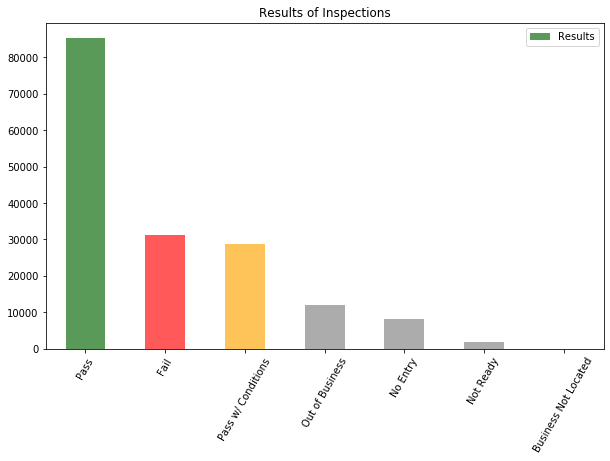

In [23]:
#Chart the data for results
results = restaurants_df["Results"].value_counts()

colors=["darkgreen", 'red', 'orange', 'gray', 'gray', 'gray', 'gray']

results.plot(kind="bar",  title="Results of Inspections",
             color=colors, alpha=0.65, rot=60, legend=True, figsize = (10,6))

# Save the figure
#plt.savefig("/Outputs/resultsofinspection.png", bbox_inches="tight")

plt.show()


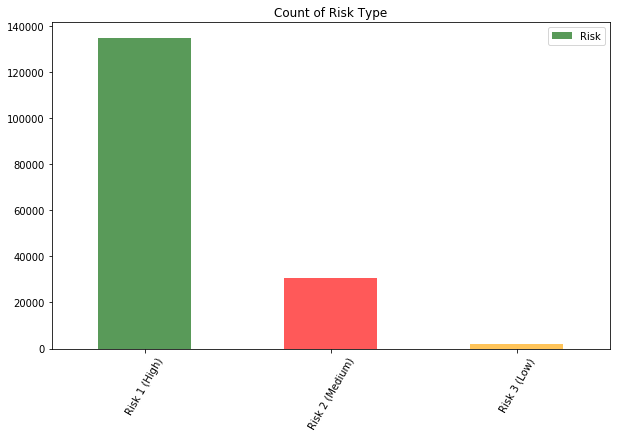

In [24]:
#Chart the data for results
risk_group = restaurants_df["Risk"].value_counts()

colors=["darkgreen", 'red', 'orange']

risk_group.plot(kind="bar",  title="Count of Risk Type",
             color=colors, alpha=0.65, rot=60, legend=True, figsize = (10, 6))

plt.show()

In [ ]:
risk1_df = restaurants_df.query("`Results` == 'Pass' and `Results` == 'Fail' and `Risk` == 'Risk 1 (High)'")

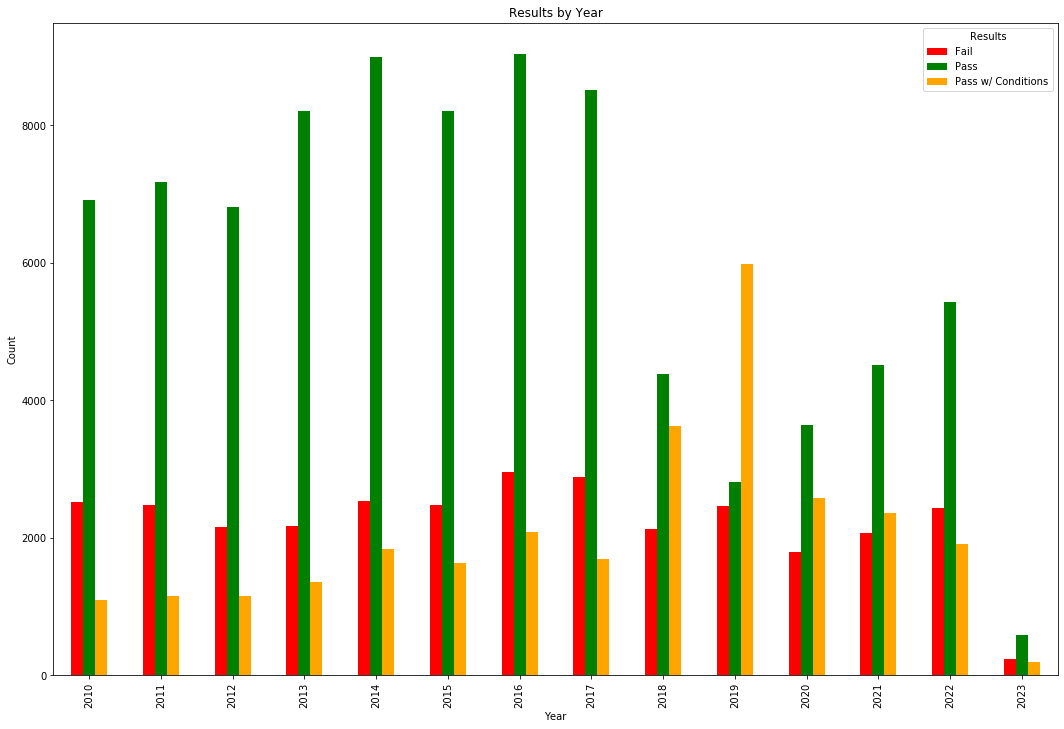

In [25]:
#create dataframe to accomodate stacked bar chart
#pass, fail, and pass w/conditions by year
#first need to parse query so that results are filtered to pass, fail, or pass w/ conditions
results_df = restaurants_df.query("`Results` == 'Pass' or `Results` == 'Fail' or `Results` == 'Pass w/ Conditions'")

grouped = results_df.groupby(["Inspection Year", "Results"])
results_counts = grouped.size().unstack()

colors=["red", 'green', 'orange']

results_counts.plot(kind = "bar", color = colors, figsize=(18, 12))

plt.title("Results by Year")
plt.xlabel("Year")
plt.ylabel("Count")

plt.show()

In [ ]:
# create data
names = ['groupA', 'groupB', 'groupC', 'groupD']
size = [12,11,3,30]
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [26]:
#chi-square test using parsed results_df
import researchpy as rp
import scipy.stats as stats

rp.summary_cat(results_df[["Risk", "Results"]])

,Variable,Outcome,Count,Percent
0,Risk,Risk 1 (High),117526,80.92
1,,Risk 2 (Medium),26174,18.02
2,,Risk 3 (Low),1542,1.06
3,Results,Pass,85251,58.70
4,,Fail,31320,21.56
5,,Pass w/ Conditions,28671,19.74


In [27]:
crosstab = pd.crosstab(results_df["Risk"], results_df["Results"])
crosstab

Results,Fail,Pass,Pass w/ Conditions
Risk,,,
Risk 1 (High),25635,68352,23539
Risk 2 (Medium),5298,15941,4935
Risk 3 (Low),387,958,197


In [28]:
stats.chi2_contingency(crosstab)

results_df["Risk"].replace("All", "All_Risk", inplace=True)

crosstab, test_results, expected = rp.crosstab(results_df["Risk"], 
                                               results_df["Results"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell",
                                               margins = False)

crosstab

Results                                  
Results            Fail   Pass Pass w/ Conditions     All
Risk                                                     
Risk 1 (High)     17.65  47.06              16.21   80.92
Risk 2 (Medium)    3.65  10.98               3.40   18.02
Risk 3 (Low)       0.27   0.66               0.14    1.06
All               21.56  58.70              19.74  100.00

In [29]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,117.3663
1,p-value =,0.0000
2,Cramer's V =,0.0201
